# Stimmungsanalyse für IMDB-Kommentare (Basic ML Models)

In diesem Projekt führen wir eine Stimmungsanalyse der IMDB-Kommentare durch, um die allgemeine Stimmung der Kommentare zu ermitteln.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_df = pd.read_csv('preprocessed/train.csv')
val_df = pd.read_csv('preprocessed/val.csv')
test_df = pd.read_csv('preprocessed/test.csv')

Wir verwenden den `TfidfVectorizer` aus `scikit-learn`, um die Textdaten in numerische Vektoren umzuwandeln. Dies geschieht durch die Berechnung der Term Frequency-Inverse Document Frequency (TF-IDF) Werte für jedes Wort im Text.

Die Methode "fit_transform" wird auf die Trainingsdaten angewendet, um das Vokabular zu lernen und die Textdaten in numerische Vektoren umzuwandeln. Derselbe Vektorisierer wird dann verwendet, um die Validierungs- und Testdaten mit der Methode `transform` zu transformieren.

In [3]:
# Vectorize text data using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['review'])
y_train = train_df['sentiment']
X_val = vectorizer.transform(val_df['review'])
y_val = val_df['sentiment']
X_test = vectorizer.transform(test_df['review'])
y_test = test_df['sentiment']

Wir trainieren vier verschiedene Modelle, um eine Sentiment-Analysis der vektorisierten Textdaten durchzuführen: Multinomial Naive Bayes", "Logistische Regression", "Lineare SVM" und "Random Forest".

In [4]:
# Train different models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Linear SVM': LinearSVC(),
    'Random Forest': RandomForestClassifier()
}

Wir bewerten die Leistung jedes Modells auf dem Validierungssatz. Dies geschieht durch den Aufruf der Methode `fit` für die Trainingsdaten (`X_train` und `y_train`) und die anschließende Verwendung des trainierten Modells, um mit der Methode `predict` Vorhersagen für die Validierungsdaten (`X_val`) zu treffen.

In [5]:
for name, model in models.items():
    print(f'Training {name}...')
    model.fit(X_train, y_train)

    # Evaluate model on validation set
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f'Validation accuracy of {name}: {acc:.4f}')
    print(classification_report(y_val, y_pred))

Training Multinomial Naive Bayes...
Validation accuracy of Multinomial Naive Bayes: 0.8629
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3705
           1       0.87      0.86      0.86      3733

    accuracy                           0.86      7438
   macro avg       0.86      0.86      0.86      7438
weighted avg       0.86      0.86      0.86      7438

Training Logistic Regression...
Validation accuracy of Logistic Regression: 0.8935
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3705
           1       0.88      0.91      0.90      3733

    accuracy                           0.89      7438
   macro avg       0.89      0.89      0.89      7438
weighted avg       0.89      0.89      0.89      7438

Training Linear SVM...
Validation accuracy of Linear SVM: 0.8962
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      370

Nach der Bewertung der Leistung jedes Modells in der Validierungsgruppe wählen wir das beste Modell auf der Grundlage der Validierungsergebnisse aus. In diesem Fall wird das Modell `LinearSVC` als das beste Modell ausgewählt.

Das beste Modell wird dann mit der Methode `Fit` auf den Trainingsdaten (X_Train und y_Train) trainiert und mit der Methode `Predict` für Vorhersagen auf den Testdaten (X_test) verwendet.

In [6]:
# Test best model on test set
best_model = LinearSVC()  # Choose the best model based on validation results
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy of {best_model}: {acc:.4f}')
print(classification_report(y_test, y_pred))

Test accuracy of LinearSVC(): 0.8912
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3705
           1       0.88      0.90      0.89      3732

    accuracy                           0.89      7437
   macro avg       0.89      0.89      0.89      7437
weighted avg       0.89      0.89      0.89      7437



Wir führen eine Abstimmung der Hyperparameter durch, um die besten Hyperparameter für das Modell `LinearSVC` zu finden. Dazu wird `GridSearchCV` aus `scikit-learn` verwendet, das eine Suche über ein bestimmtes Parametergitter durchführt.


In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
clf = GridSearchCV(
    LinearSVC(max_iter=10000),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
clf.fit(X_train, y_train)

# Print the best hyperparameters found
print(f'Best hyperparameters: {clf.best_params_}')

# Evaluate the best model on the validation set
best_model = clf.best_estimator_
y_pred = best_model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f'Validation accuracy of best model: {acc:.4f}')
print(classification_report(y_val, y_pred))

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy of best model: {acc:.4f}')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\swt4fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\swt4fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\swt4fe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                                           ^^^^^^^^^^^^^^^
  Fil

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Validation accuracy of best model: 0.8933
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3705
           1       0.88      0.91      0.90      3733

    accuracy                           0.89      7438
   macro avg       0.89      0.89      0.89      7438
weighted avg       0.89      0.89      0.89      7438

Test accuracy of best model: 0.8915
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3705
           1       0.88      0.91      0.89      3732

    accuracy                           0.89      7437
   macro avg       0.89      0.89      0.89      7437
weighted avg       0.89      0.89      0.89      7437



# Stimmungsanalyse für IMDB-Kommentare (Basic NN Model)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding,Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

Wir verwenden den Tokenizer von keras, um die Textdaten zu tokenisieren. 

Die Sequenzen werden dann mit Hilfe der Funktion `pad_sequences` von keras auf eine feste Länge von 500 aufgefüllt. Dies geschieht durch Hinzufügen von Nullen am Ende der Sequenzen (oder durch Entfernen von Wörtern am Ende), bis sie die gewünschte Länge haben.

In [9]:
# Tokenize text data and pad sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'])
X_train = tokenizer.texts_to_sequences(train_df['review'])
X_train = pad_sequences(X_train, maxlen=500, padding='post', truncating='post')
y_train = train_df['sentiment']
X_val = tokenizer.texts_to_sequences(val_df['review'])
X_val = pad_sequences(X_val, maxlen=500, padding='post', truncating='post')
y_val = val_df['sentiment']
X_test = tokenizer.texts_to_sequences(test_df['review'])
X_test = pad_sequences(X_test, maxlen=500, padding='post', truncating='post')
y_test = test_df['sentiment']

Wir trainieren ein vanilla neuronales Netzwerk, um eine Stimmungsanalyse auf den mit Token versehenen und aufgefüllten Textdaten durchzuführen. Das Modell wird mit der API `Sequential` von Keras erstellt. Das Model besteht aus einem Embedding-layer, der eine 32-dimensionale Repräsentation für jedes Wort im Vokabular erlernt (max 10.000 words). Die Ausgabe der Embedding-Schicht wird dann abgeflacht und in zwei "Dense"-Schichten mit "Relu"- bzw. "Sigmoid"-Aktivierungsfunktionen geleitet.

Das Model wird auf den Trainingsdaten für 10 Epochen mit einer Batchsize von 128 trainiert.


Epoch 1/10
272/272 [==============================] - 6s 19ms/step - loss: 0.5646 - accuracy: 0.6404 - val_loss: 0.3048 - val_accuracy: 0.8773
Epoch 2/10
272/272 [==============================] - 5s 18ms/step - loss: 0.2390 - accuracy: 0.9064 - val_loss: 0.2830 - val_accuracy: 0.8856
Epoch 3/10
272/272 [==============================] - 5s 18ms/step - loss: 0.1162 - accuracy: 0.9636 - val_loss: 0.3066 - val_accuracy: 0.8830
Epoch 4/10
272/272 [==============================] - 5s 18ms/step - loss: 0.0384 - accuracy: 0.9921 - val_loss: 0.3649 - val_accuracy: 0.8774
Epoch 5/10
272/272 [==============================] - 5s 19ms/step - loss: 0.0119 - accuracy: 0.9987 - val_loss: 0.4187 - val_accuracy: 0.8746
Epoch 6/10
272/272 [==============================] - 5s 19ms/step - loss: 0.0047 - accuracy: 0.9997 - val_loss: 0.4583 - val_accuracy: 0.8787
Epoch 7/10
272/272 [==============================] - 5s 19ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.4915 - val_accuracy: 0.8764

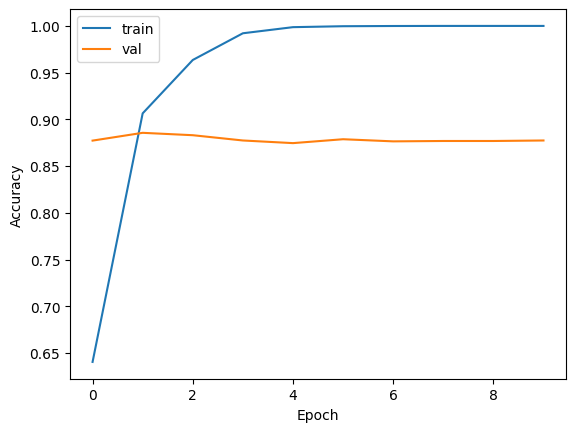

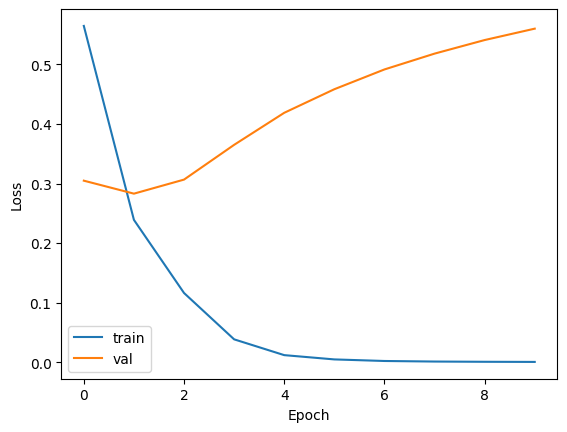

In [10]:
import matplotlib.pyplot as plt
# Train a vanilla neural network
model_1 = Sequential()
model_1.add(Embedding(input_dim=10000, output_dim=32, input_length=500))
model_1.add(Flatten())
model_1.add(Dense(units=16, activation='relu'))
model_1.add(Dense(units=1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, verbose=1)

# Evaluate the vanilla neural network on the test set
y_pred = model_1.predict(X_test)
y_pred = np.round(y_pred).flatten()
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy of vanilla neural network: {acc:.4f}')
print(classification_report(y_test, y_pred))

# Plot the training and validation accuracy
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Overfitting? Ein Anzeichen für Overfitting ist, wenn die Trainingsgenauigkeit weiter steigt, während die Validierungsgenauigkeit abnimmt. Dies deutet darauf hin, dass sich das Modell die Trainingsdaten merkt, anstatt zu lernen und auf neue Daten zu verallgemeinern.
Eventuell hilft es, eine Dropoutschicht hinzuzufügen und das Modell etwas komplexer zu machen:

Epoch 1/10
272/272 [==============================] - 33s 120ms/step - loss: 0.4059 - accuracy: 0.7918 - val_loss: 0.2581 - val_accuracy: 0.8966
Epoch 2/10
272/272 [==============================] - 33s 122ms/step - loss: 0.2024 - accuracy: 0.9246 - val_loss: 0.2705 - val_accuracy: 0.8927
Epoch 3/10
272/272 [==============================] - 34s 125ms/step - loss: 0.1247 - accuracy: 0.9559 - val_loss: 0.3040 - val_accuracy: 0.8930
Epoch 4/10
272/272 [==============================] - 35s 129ms/step - loss: 0.0707 - accuracy: 0.9766 - val_loss: 0.4100 - val_accuracy: 0.8884
Epoch 5/10
272/272 [==============================] - 35s 128ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.6637 - val_accuracy: 0.8725
Epoch 6/10
272/272 [==============================] - 34s 125ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.6395 - val_accuracy: 0.8798
Epoch 7/10
272/272 [==============================] - 35s 130ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.7630 - val_ac

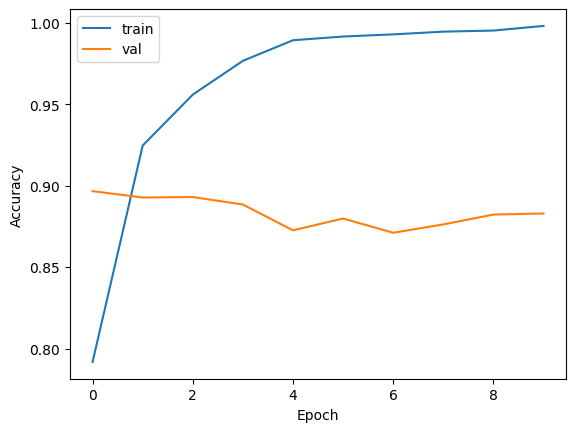

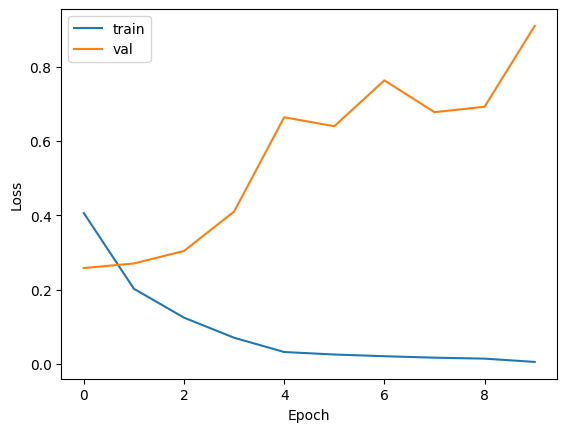

In [11]:
from keras.layers import Embedding, Conv1D, MaxPooling1D
# Train a more complex neural network
model_2 = Sequential()
model_2.add(Embedding(input_dim=10000, output_dim=64, input_length=500))
model_2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(units=128, activation='relu'))
model_2.add(Dropout(rate=0.5))
model_2.add(Dense(units=1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, verbose=1)

# Evaluate the more complex neural network on the test set
y_pred = model_2.predict(X_test)
y_pred = np.round(y_pred).flatten()
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy of more complex neural network: {acc:.4f}')
print(classification_report(y_test, y_pred))

# Plot the training and validation accuracy
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Man kann sehen, dass das Model etwas besser performt, jedoch das Problem des Overfittings immernoch besteht. Im nächsten Notebook wird deshalb eine für Sprachsequenzen optimierte Archtiektur, genannt LSTM, genutzt und evaluiert.